# Housing 


### Get data from remote

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


### Reading data from housing data

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.std()

longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

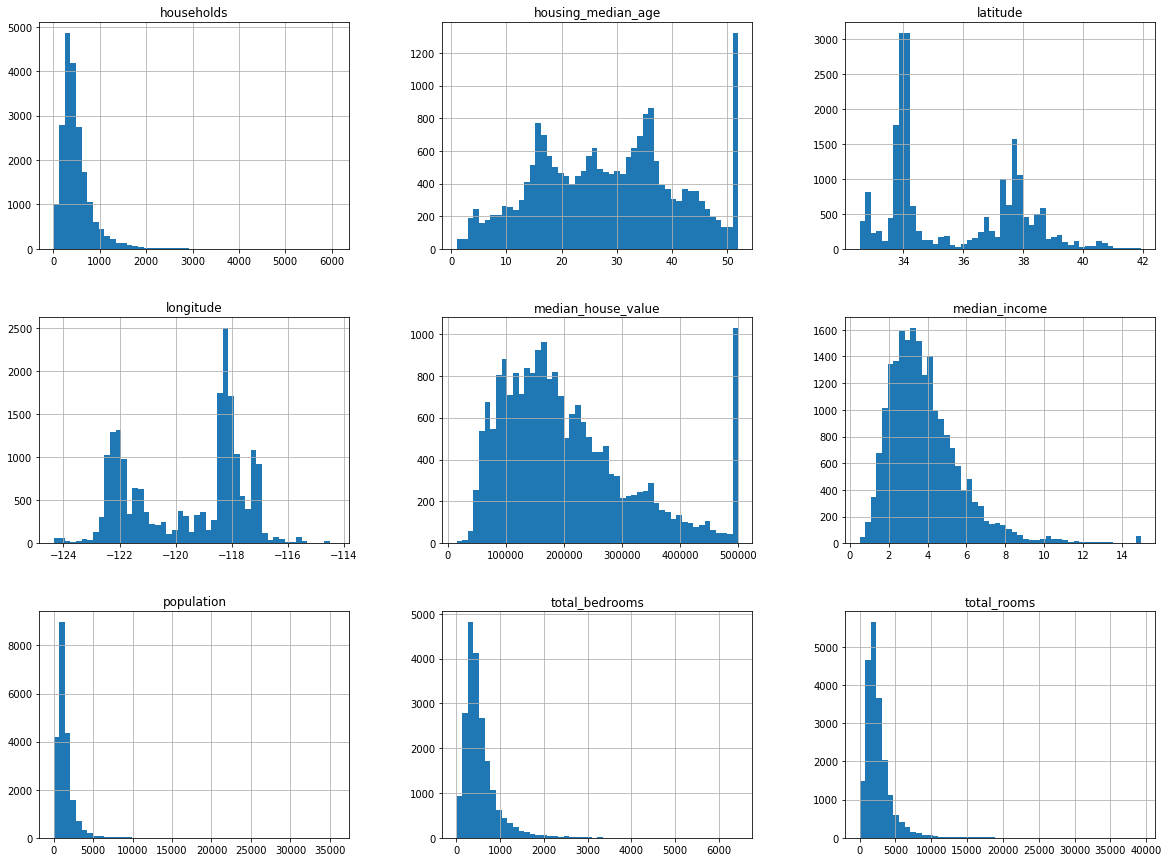

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# housing.housing_median_age.hist(bins=50, figsize=(20, 15))
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Create Test Set

### With random number

In [8]:
import numpy as np
def split_train_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_set(housing, 0.2)
print(f"{len(train_set)} train set size ___ {len(test_set)} test_set_size")

16512 train set size ___ 4128 test_set_size


### With a hash function

In [10]:
import hashlib
def test_set_check(identifier, test_ratio, hash_function):
    last_byte = hash_function(np.int64(identifier)).digest()[-1]
    return last_byte < 256 * test_ratio

def split_train_set_by_id(data, test_ratio, id_column,
                          hash_function=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda _id: test_set_check(_id, test_ratio, hash_function))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [11]:
housing_with_index = housing.reset_index()
train_set, test_set = split_train_set_by_id(housing_with_index, 0.2, "index")
print(f"{len(train_set)} train set size ___ {len(test_set)} test_set_size")

16362 train set size ___ 4278 test_set_size


##### We can use position info as index

In [12]:
housing_with_index["id"] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_set_by_id(housing_with_index, 0.2, "id")
print(f"{len(train_set)} train set size ___ {len(test_set)} test_set_size")

16267 train set size ___ 4373 test_set_size


As you **see** it could be not exactly test ratio in hash method. 

### With scikit-learn 

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"{len(train_set)} train set size ___ {len(test_set)} test_set_size")

16512 train set size ___ 4128 test_set_size


### With Stratified Sampling

In [14]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
for train_set_index, test_set_index in split.split(housing, housing["income_cat"]):
    start_train_set = housing.iloc[train_set_index]
    start_test_set = housing.iloc[test_set_index]
print(f"{len(start_train_set)} train set size ___ {len(start_test_set)} test_set_size")

16512 train set size ___ 4128 test_set_size


In [16]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
start_train_set["income_cat"].value_counts()/ len(start_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

As you **see** datas splited in stratified mode

#### Deleting income_cat from hosuing values. 
It is a unnecessary field after this step.

In [18]:
# for set in (start_train_set, start_test_set):
#     print(set)
for set in (start_train_set, start_test_set) :
    set.drop(labels="income_cat", axis=1, inplace=True) ## Axis = 1 means deleting from columns

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Discover and Visualize

In [19]:
housing = start_train_set.copy()

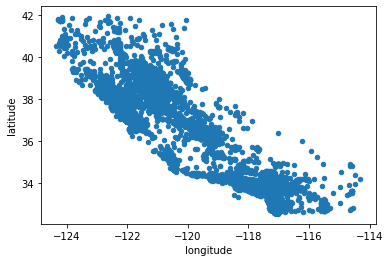

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

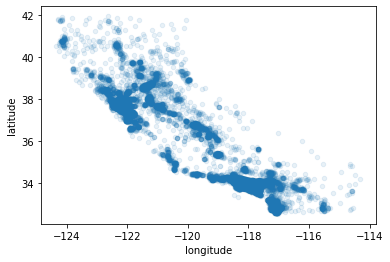

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

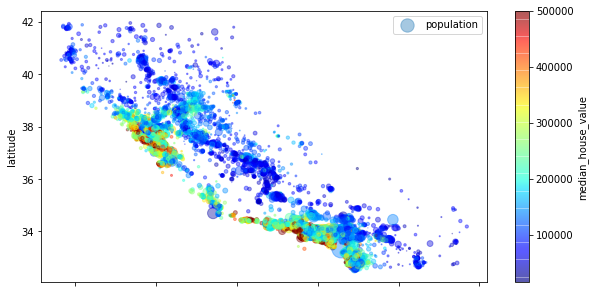

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing["population"]/100, label="population",
                c="median_house_value", cmap=plt.get_cmap("jet"),
                colorbar=True, figsize=(10,5))


## Looking For Correlations 

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115687160>,
      dtype=object)

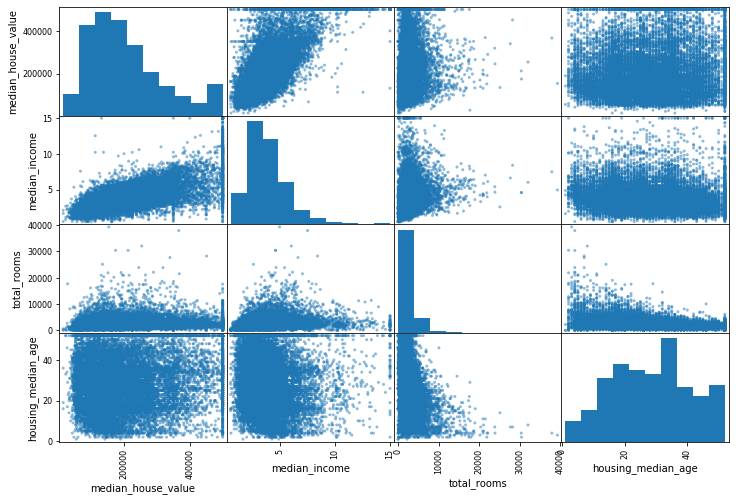

In [26]:
from pandas.plotting import scatter_matrix
atts = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[atts], figsize=(12, 8))

In [27]:
housing["rooms_per_households"] = housing["total_rooms"] / housing["households"]
housing["population_per_households"] = housing["population"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households,bedrooms_per_room
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,2.094395,0.223852
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,2.707965,0.159057
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,2.025974,0.241291
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,4.135977,0.200866
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,3.047847,0.231341


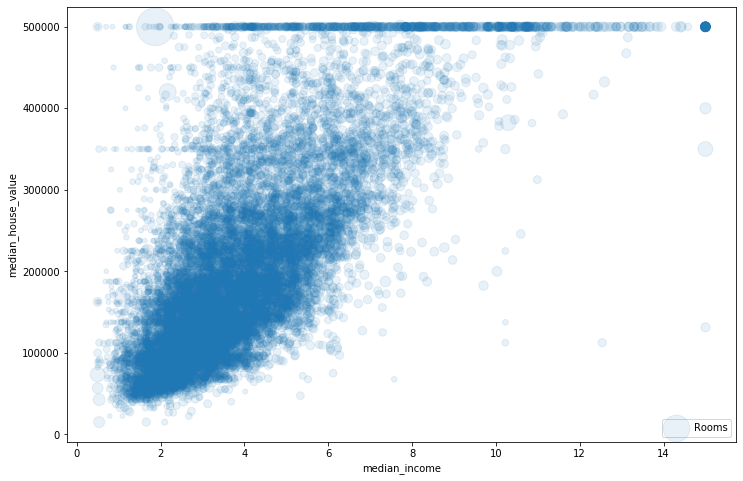

In [29]:
housing.plot(kind="scatter", y="median_house_value", x="median_income", alpha=0.1, figsize=(12,8),
            s=housing["rooms_per_households"] * 10, label="Rooms")


In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_households         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_room           -0.259984
Name: median_house_value, dtype: float64

## Prepare Data For ML

In [31]:
housing = start_train_set.drop("median_house_value", axis=1)
housing_labels = start_train_set["median_house_value"].copy()

## Cleaning Datas
first we see if there is a null value in data set. 

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### Can be handled with drop , dropna and fillna


In [33]:
housing.drop("total_bedrooms", axis=1)
housing.dropna(subset=["total_bedrooms"])
median = housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

### Can be handled by scikit-learn


In [34]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [38]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


### Handling Text

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing.ocean_proximity
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [40]:
encoder.classes_
cat_one_hot_attrs = list(encoder.classes_)
cat_one_hot_attrs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

Then change it to **one-hot** coding

In [41]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### It could be handled with just one shot

In [43]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
housing_cat_1hot = binarizer.fit_transform(housing_cat)
housing_cat_1hot


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_households = X[:, 3] / X[:, 6]
        population_per_households = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room : 
            bedrooms_per_room = X[:, 4] / X[:, 6]
            return pd.DataFrame(np.c_[X, rooms_per_households, population_per_households, bedrooms_per_room])
        return pd.DataFrame(np.c_[X, rooms_per_households, population_per_households])


In [45]:
attr_addr = CombineAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attr = attr_addr.transform(housing.values)
housing_extra_attr = pd.DataFrame(housing_extra_attr)
housing_extra_attr.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## Feature Scaling
All Features should be in a specific range. For this we can use **MinMaxScaler** or **StandardScaler**.

## Transformation Pipelines

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipline = Pipeline([
    ("imputer", Imputer(strategy="median")),
    ("attr_addr", CombineAttributeAdder()),
    ("std_scale", StandardScaler()),
])


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [47]:
housing_num_tr = pipline.fit_transform(housing_num)
housing_num_tr = pd.DataFrame(housing_num_tr)

### Can Union Some Pipline

In [48]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [49]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attrs].values
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly,self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [50]:
from sklearn.pipeline import FeatureUnion

cat_attrs = ["ocean_proximity"]
num_attrs = list(housing_num.columns.values)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', Imputer(strategy="median")),
    ('attr_adder', CombineAttributeAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one-hot', LabelBinarizerPipelineFriendly()),
])

full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
# housing_prepared = pd.DataFrame(housing_prepared)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Train Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
some_data = housing.iloc[:5]
some_label = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"Predictions are {linear_model.predict(some_data_prepared)}\n\n\n")
print(f"Lables are {list(some_label)}")

Predictions are [211881.21811279 321219.24211009 210877.63065012  62198.25451316
 194847.8414579 ]



Lables are [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Measure Errors

In [54]:
from sklearn.metrics import mean_squared_error
housing_prediction = linear_model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.49637588045

## What about DesicionTree?

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
housing_prediction = tree_model.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross-Validation 
Thiis cross validation is used for testing training algorithm over k-fold cross-validation

In [57]:
from sklearn.model_selection import cross_validate
scores = cross_validate(tree_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [58]:
rmse_scores = np.sqrt(-scores['test_score'])
def display_scores(scores):
    print(f"Scores : {scores}")
    print(f"Mean : {scores.mean()}")
    print(f"Standard Deviation : {scores.std()}")
display_scores(rmse_scores)

Scores : [70425.57798257 70311.80084491 70268.89036864 71721.04320942
 69103.234761   76052.87288898 71859.18034627 70412.53393131
 77829.89137034 69801.11964786]
Mean : 71778.61453512956
Standard Deviation : 2722.0006920214746


_So we can recognize **Desicion Tree** is overfitted so badly!_

#### We Can See Linear Cross-Validation : 


In [59]:
scores = cross_validate(linear_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores['test_score'])
display_scores(rmse_scores)

Scores : [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]
Mean : 69302.41894389637
Standard Deviation : 2653.4606994470405


So **Linear** is better than **Decision Tree** here

## What about Random Forest Regressor ?


In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
scores = cross_validate(rf_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores['test_score'])
display_scores(rmse_scores)

Scores : [53248.5758953  49391.18095384 52065.51197971 54534.62582262
 52891.38991672 55821.91554214 52325.84684788 50981.98112321
 55440.09127041 52236.2279674 ]
Mean : 52893.734731922064
Standard Deviation : 1877.2337454255721


## Grid Search
This is to search all kind of hyper parameters to find best using a grid search.


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="neg_mean_squared_error")

In [63]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],

In [64]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
best_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
best_model.fit(housing_prepared, housing_labels)
scores = cross_validate(best_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores['test_score'])
display_scores(rmse_scores)

Scores : [49184.51801298 47023.85228018 49677.56444339 51249.04811519
 48338.12907247 53637.57324563 47564.69843393 47115.84558191
 52486.13776747 49276.5119445 ]
Mean : 49555.38788976341
Standard Deviation : 2148.414839023697


## Randomized Search
It can be used by saying number of iterations.


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {'n_estimators': sp_randint(1, 30), 'max_features': sp_randint(1, 10), 'bootstrap' : [True, False]}


randomized_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, cv=10, scoring="neg_mean_squared_error")

In [67]:
randomized_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [68]:
randomized_search.best_estimator_


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=22,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [69]:
best_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=27,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
best_model.fit(housing_prepared, housing_labels)
scores = cross_validate(best_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores['test_score'])
display_scores(rmse_scores)

Scores : [48865.45416918 46730.71076226 49330.99905893 51826.66184078
 49826.28582327 53416.34248575 49002.32085683 47690.63425422
 52265.5873866  50261.00002339]
Mean : 49921.59966612048
Standard Deviation : 1973.0521942555085


## Finding Most Important Features

In [70]:
feature_importance = randomized_search.best_estimator_.feature_importances_
feature_importance

array([8.54981587e-02, 7.21595966e-02, 4.22214519e-02, 1.79870555e-02,
       1.64662032e-02, 1.70378671e-02, 1.53545935e-02, 3.45873001e-01,
       8.31251796e-02, 1.06690124e-01, 2.39680914e-02, 1.70028608e-02,
       1.48479715e-01, 1.03639585e-04, 3.06828242e-03, 4.96417941e-03])

In [71]:
extra_attrs = ["rooms_per_house", "pop_per_house", "bedrooms_per_rooms"]
attributes = num_attrs + extra_attrs + cat_one_hot_attrs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3458730014132496, 'median_income'),
 (0.14847971534136775, 'INLAND'),
 (0.10669012363767992, 'pop_per_house'),
 (0.0854981586779615, 'longitude'),
 (0.08312517959233308, 'rooms_per_house'),
 (0.07215959656102529, 'latitude'),
 (0.04222145189134443, 'housing_median_age'),
 (0.023968091403203284, 'bedrooms_per_rooms'),
 (0.017987055477991457, 'total_rooms'),
 (0.0170378671202888, 'population'),
 (0.01700286081720804, '<1H OCEAN'),
 (0.016466203189522046, 'total_bedrooms'),
 (0.0153545934629338, 'households'),
 (0.004964179413564954, 'NEAR OCEAN'),
 (0.0030682824157433827, 'NEAR BAY'),
 (0.00010363958458264132, 'ISLAND')]

## Finaly Use Test Set and Final Model

In [72]:
final_model = grid_search.best_estimator_

X_test = start_test_set.drop("median_house_value", axis=1)
Y_test = start_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)


In [73]:
prediction_vs_reality = pd.DataFrame({'prediction: ':final_predictions,
                                     'reality: ':Y_test})
prediction_vs_reality.head()

,prediction:,reality:
5241,489250.833333,500001.0
10970,275903.366667,240300.0
20351,216020.033333,218200.0
6568,212333.333333,182100.0
13285,135650.000000,121300.0


In [74]:
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47434.693019680715

## You see our prediction is not bad!

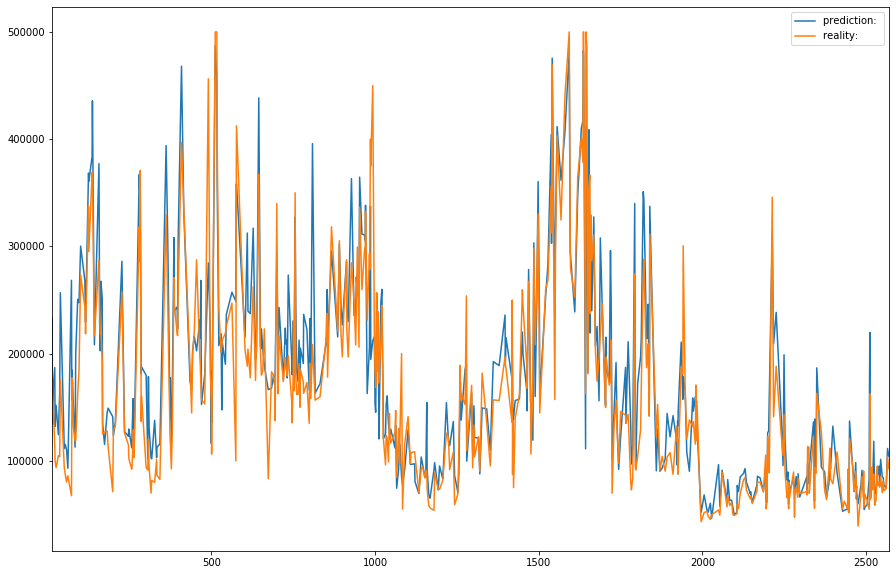

In [75]:
prediction_vs_reality.sort_index()[0:500].plot(figsize=(15,10), label="prediction vs reality")

# Excercises

## SVR

In [76]:
from sklearn.svm import SVR
svr_model = SVR()
param_grid = [
    {'kernel' : ['linear'], 'C' : [1.0, 0.5, 1.5, 2]},
    {'kernel' : ['rbf'], 'C' : [1.0, 0.5, 1.5, 2], 'gamma':['auto', 'scale']},
]
grid_search = GridSearchCV(svr_model, param_grid=param_grid, cv=10, scoring="neg_mean_squared_error")

In [77]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1.0, 0.5, 1.5, 2], 'kernel': ['linear']},
                         {'C': [1.0, 0.5, 1.5, 2], 'gamma': ['auto', 'scale'],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [78]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

112262.30105470984 {'C': 1.0, 'kernel': 'linear'}
115475.99530672701 {'C': 0.5, 'kernel': 'linear'}
109196.22149661096 {'C': 1.5, 'kernel': 'linear'}
106333.71397064015 {'C': 2, 'kernel': 'linear'}
118620.33989335889 {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
118611.38802561874 {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
118776.78129639923 {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
118771.80903643003 {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
118467.76034254888 {'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf'}
118453.86586652022 {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf'}
118313.05547912611 {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
118295.80293399477 {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [79]:
best_model = grid_search.best_estimator_
best_model.fit(housing_prepared, housing_labels)
scores = cross_validate(best_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores['test_score'])
display_scores(rmse_scores)

Scores : [100319.37001966 106680.50738453 104520.31548239 107824.87039005
 105039.40213242 110304.87187396 105058.72953263 108595.1590216
 108507.0330393  106157.5595878 ]
Mean : 106300.78184643298
Standard Deviation : 2659.5698624593942


#### So we can recognize random forest is better

## Remove extra information 

In [80]:
class RemoveExtraAttrs(BaseEstimator, TransformerMixin):
    def __init__(self, attributes, delete_extra_ocean_flags=True, delete_totals=True):
        self.delete_extra_ocean_flags = delete_extra_ocean_flags
        self.delete_totals = delete_totals
        self.first_attrs = attributes
    def fit(self, X, y=None):
        if(self.delete_extra_ocean_flags and self.delete_totals):
            self.attrs_to_delete = [3, 4, 5, 6, 11, 13, 14, 15]
        elif(self.delete_extra_ocean_flags):
            self.attrs_to_delete = [11, 13, 14, 15]
        elif(self.delete_totals):
            self.attrs_to_delete = [3, 4, 5, 6]
        self.attrs = np.delete(self.first_attrs, self.attrs_to_delete)
        return self
    def transform(self, X, y=None):
        have=[x for x in range(0, 16) if x not in self.attrs_to_delete]
        return X[:, have]

In [81]:
very_full_pipline = Pipeline([
    ('full_pipeline' , full_pipeline),
    ('RemoveExtraAttrs' , RemoveExtraAttrs(attributes=attributes))
])
housing_very_prepared = very_full_pipline.fit_transform(housing)

In [82]:
housing_very_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.08649871,
        -0.1215581 ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.03353391,
        -0.26453207,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.09240499,
        -0.15013227,  0.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.03055414,
         0.06597972,  1.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.06150916,
        -0.06408293,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.09586294,
        -0.06430388,  0.        ]])

In [83]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="neg_mean_squared_error")
grid_search.fit(housing_very_prepared, housing_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],

In [84]:
best_model = grid_search.best_estimator_
best_model.fit(housing_prepared, housing_labels)
scores = cross_validate(best_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores['test_score'])
display_scores(rmse_scores)

Scores : [52072.37046837 50290.43584498 52968.03660227 54678.20229325
 54158.79612925 55003.4103754  50838.72623754 51723.52779738
 55807.08782395 52391.76301735]
Mean : 52993.23565897464
Standard Deviation : 1758.5733687029367
